In [38]:
import pandas as pd, numpy as np, scipy
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
from tslearn.clustering import KShape
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [24]:
import warnings
import matplotlib.cbook

plt.rcParams.update({'figure.max_open_warning': 0})
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [25]:
df = pd.read_csv("../data/Repayments.csv", delimiter=';')
static = pd.read_csv("../data/Static.csv", delimiter=';')

In [143]:
static.head()

CONTRACT_ID  CLIENT_ID  TERM  CONTRACT_SUM GENDER  AGE  LOAN_TO_INCOME  \
0     17228104     251471    60       1185.75      M   32              10   
1     17237409     251501    18        512.47      M   30               7   
2     17276280     251669    60       1529.24      M   36              10   
3     17282809     251684    60        906.53      M   27               6   
4     17283247     251692    60       1593.50      F   50              18   

   PAYMENT_TO_INCOME  DOWNPAYMENT  CAR_CATEGORY  GRACE_PERIOD  \
0               0.22          0.4             2             6   
1               0.37          0.7             2            18   
2               0.23          0.1             2             6   
3               0.15          0.3             1             6   
4               0.42          0.1             2             6   

   RATE_CHANGE_AFTER_GRACE  
0                       13  
1                       15  
2                       13  
3                       13  
4                       13

In [144]:
def print_contract(contract_id):
    pivot_scheduled
    plt.figure()
    pivot_scheduled.loc[contract_id].T.plot(figsize=(12, 12), linewidth = 5)
    pivot_actual.loc[contract_id].T.plot(figsize=(12, 12), linewidth = 5)
    plt.ylim(ymin=0)
    title = ", ".join(["{} - {}\n".format(k, list(v.values())[0]) for k, v in static[static['CONTRACT_ID'] == pivot_actual.loc[contract_id].name].to_dict().items()])

    plt.title(title)

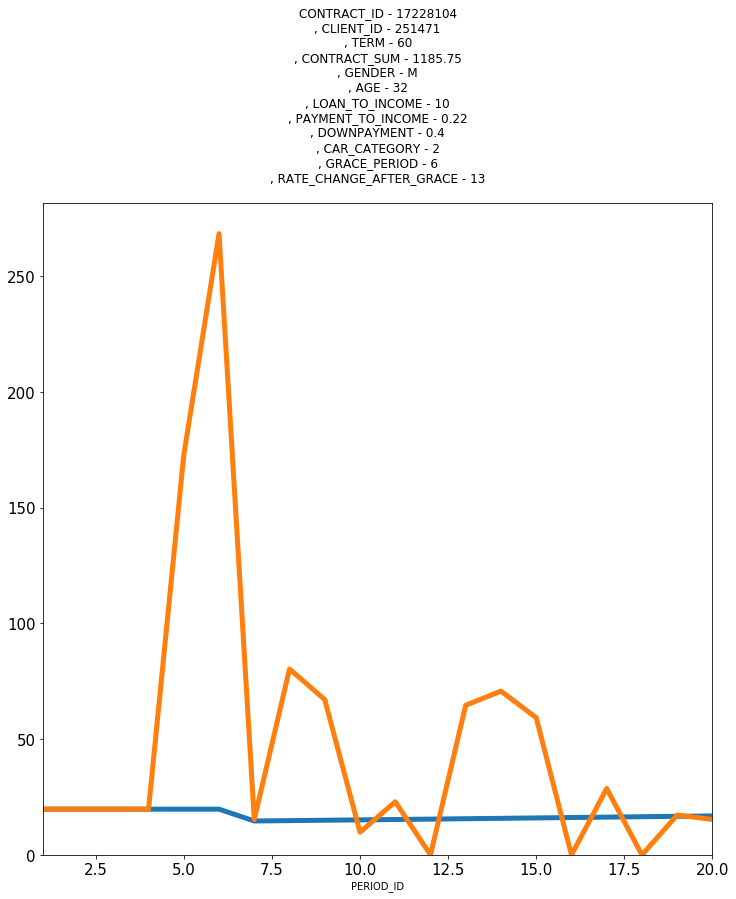

In [145]:
print_contract(17228104)

In [26]:
pivot_scheduled = df.pivot_table(index=['CONTRACT_ID'], columns=['PERIOD_ID'], values=['REPAYMENT_SCHEDULED']).replace(np.nan, 0)
pivot_actual = df.pivot_table(index=['CONTRACT_ID'], columns=['PERIOD_ID'], values=['REPAYMENT_ACTUAL']).replace(np.nan, 0)

In [27]:
pivot_scheduled = pivot_scheduled.loc[:,'REPAYMENT_SCHEDULED'].loc[:,:20]
pivot_actual = pivot_actual.loc[:,'REPAYMENT_ACTUAL']
#pivot_scheduled[pivot_actual == 0] = 0

In [68]:
pivot = (pivot_actual.cumsum(axis=1) - pivot_scheduled.cumsum(axis=1)) / np.array([static.set_index('CONTRACT_ID').loc[pivot_scheduled.index.values]['CONTRACT_SUM'] for i in range(20)]).T

In [69]:
X_train = pivot.values

In [70]:
pivot.head()

PERIOD_ID          1             2             3         4         5   \
CONTRACT_ID                                                             
17228104     0.000000  0.000000e+00  0.000000e+00  0.000000  0.129032   
17237409     0.000429  1.600094e-03  2.770894e-03  0.003942  0.005112   
17276280     0.000000  0.000000e+00  0.000000e+00  0.000000  0.000000   
17282809     0.000000  0.000000e+00  0.000000e+00  0.000000  0.000000   
17283247     0.000138 -4.459007e-18 -8.918014e-18  0.000132  0.000264   

PERIOD_ID              6         7         8         9         10        11  \
CONTRACT_ID                                                                   
17228104     3.387308e-01  0.339279  0.394527  0.438482  0.433978  0.440439   
17237409     6.283295e-03  0.007454  0.008625  0.009796  0.010966  0.012137   
17276280     0.000000e+00  0.000000  0.000000  0.862546  0.849788  0.836886   
17282809     9.000143e-01  0.887660  0.875172  0.862553  0.849790  0.836895   
17283247    -1.783603e-17 -0.012356 -0.012356 -0.012356 -0.012356 -0.012011   

PERIOD_ID          12        13        14        15        16        17  \
CONTRACT_ID                                                               
17228104     0.427400  0.468733  0.515083  0.551617  0.538005  0.548429   
17237409     0.333424  0.277870  0.222315  0.166761  0.111207  0.055652   
17276280     0.823847  0.810664  0.797344  0.783880  0.770265  0.756506   
17282809     0.823856  0.810674  0.797348  0.783879  0.770267  0.756511   
17283247    -0.012356 -0.012356 -0.025679 -0.025679 -0.025679 -0.025679   

PERIOD_ID          18        19        20  
CONTRACT_ID                                
17228104     0.534522  0.534978  0.533671  
17237409     0.000098  0.000098  0.000098  
17276280     0.742598  0.728538  0.714329  
17282809     0.742601  0.728547  0.714339  
17283247    -0.023897 -0.037954 -0.037709

In [71]:
n_clasters = 8
sz = X_train.shape[1]
seed = 13

# Euclidean k-means

Euclidean k-means
0.193 --> 0.128 --> 0.127 --> 0.127 --> 0.127 --> 0.127 --> 0.127 --> 0.126 --> 0.126 --> 0.126 --> 0.126 --> 0.126 --> 0.126 --> 


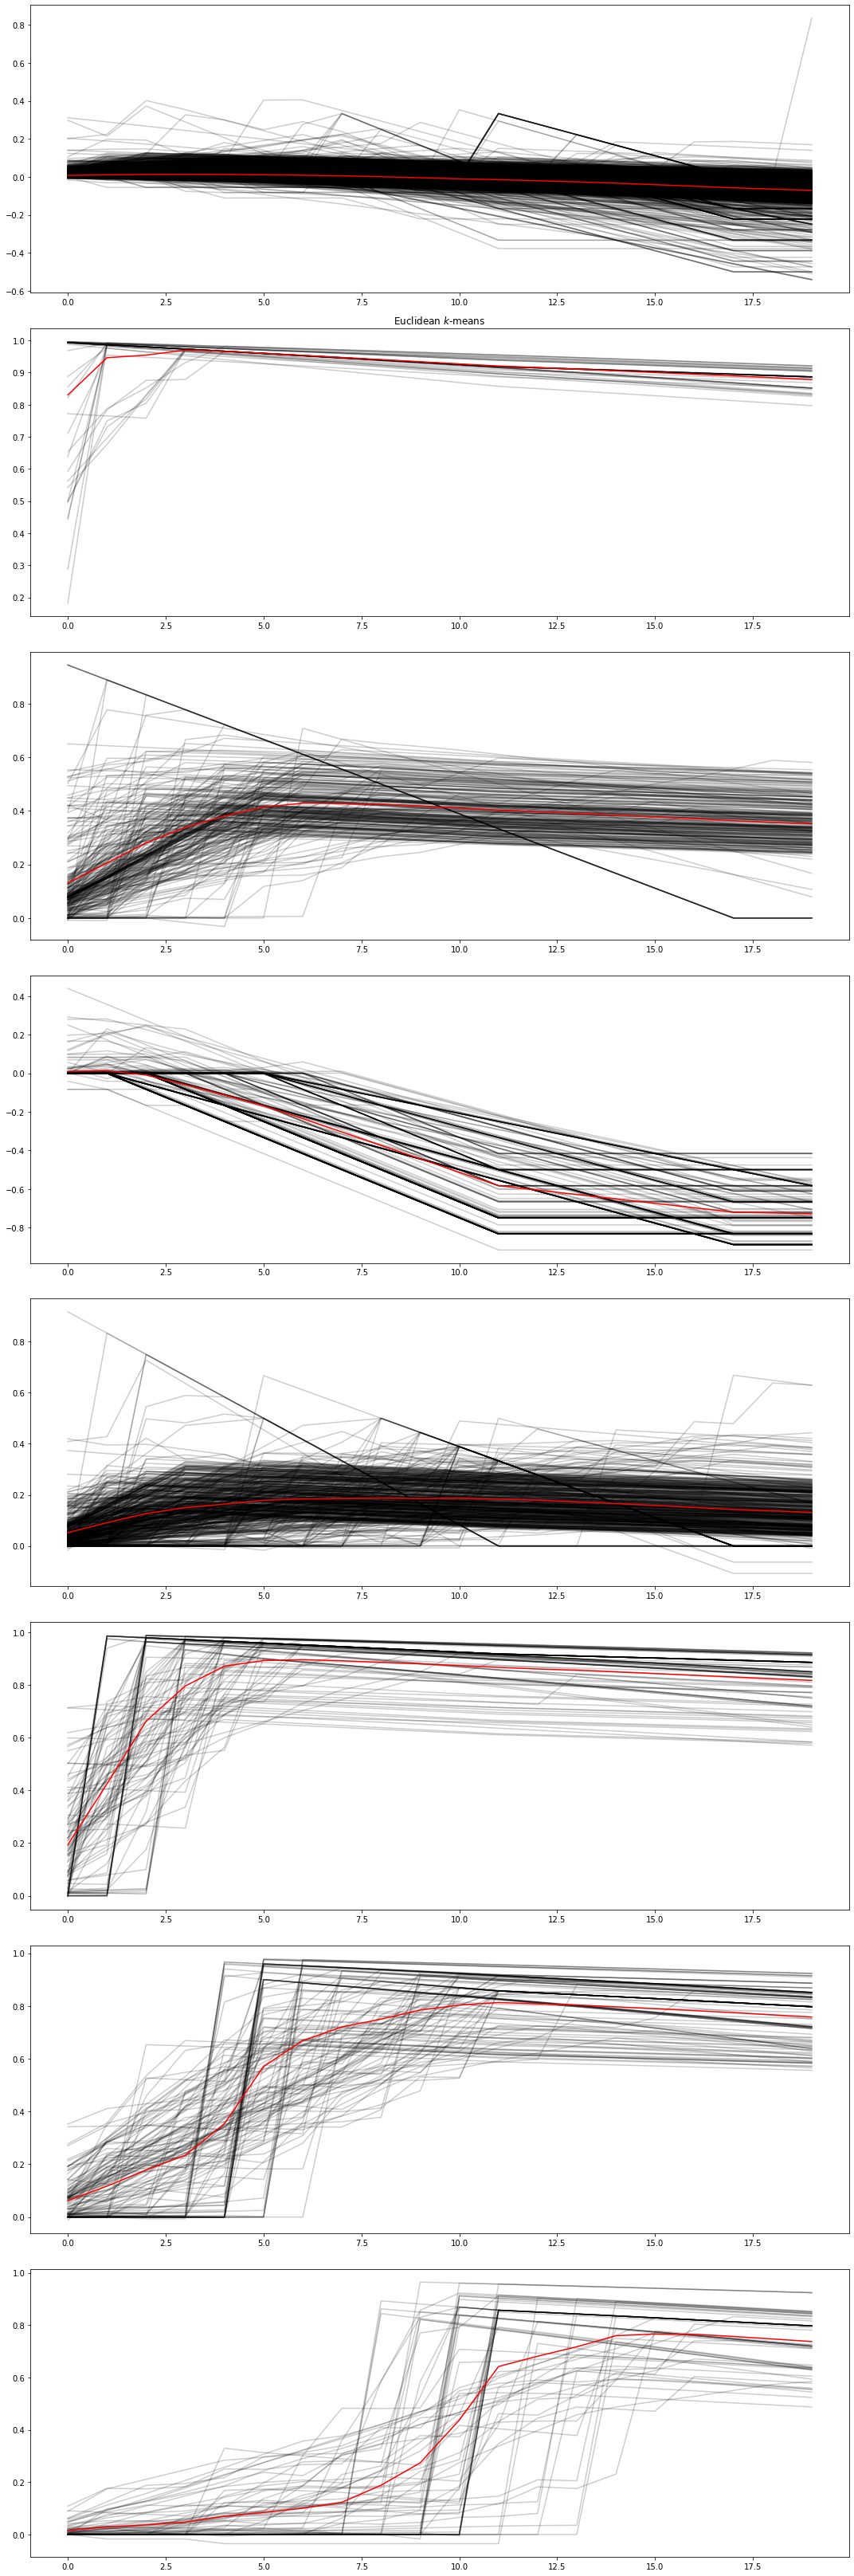

In [82]:
# Euclidean k-means

n_clasters = 8
print("Euclidean k-means")
km_8 = TimeSeriesKMeans(n_clusters=n_clasters, verbose=True, random_state=seed)
y_pred = km_8.fit_predict(X_train)

plt.figure(figsize=(15,45))
for yi in range(n_clasters):
    plt.subplot(n_clasters, 1, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km_8.cluster_centers_[yi].ravel(), "r-")
    if yi == 1:
        plt.title("Euclidean $k$-means")


plt.tight_layout()
plt.show()

Euclidean k-means
0.091 --> 0.069 --> 0.068 --> 0.067 --> 0.066 --> 0.066 --> 0.066 --> 0.066 --> 0.066 --> 0.066 --> 0.066 --> 0.066 --> 0.066 --> 0.066 --> 0.066 --> 0.066 --> 0.066 --> 0.066 --> 0.066 --> 


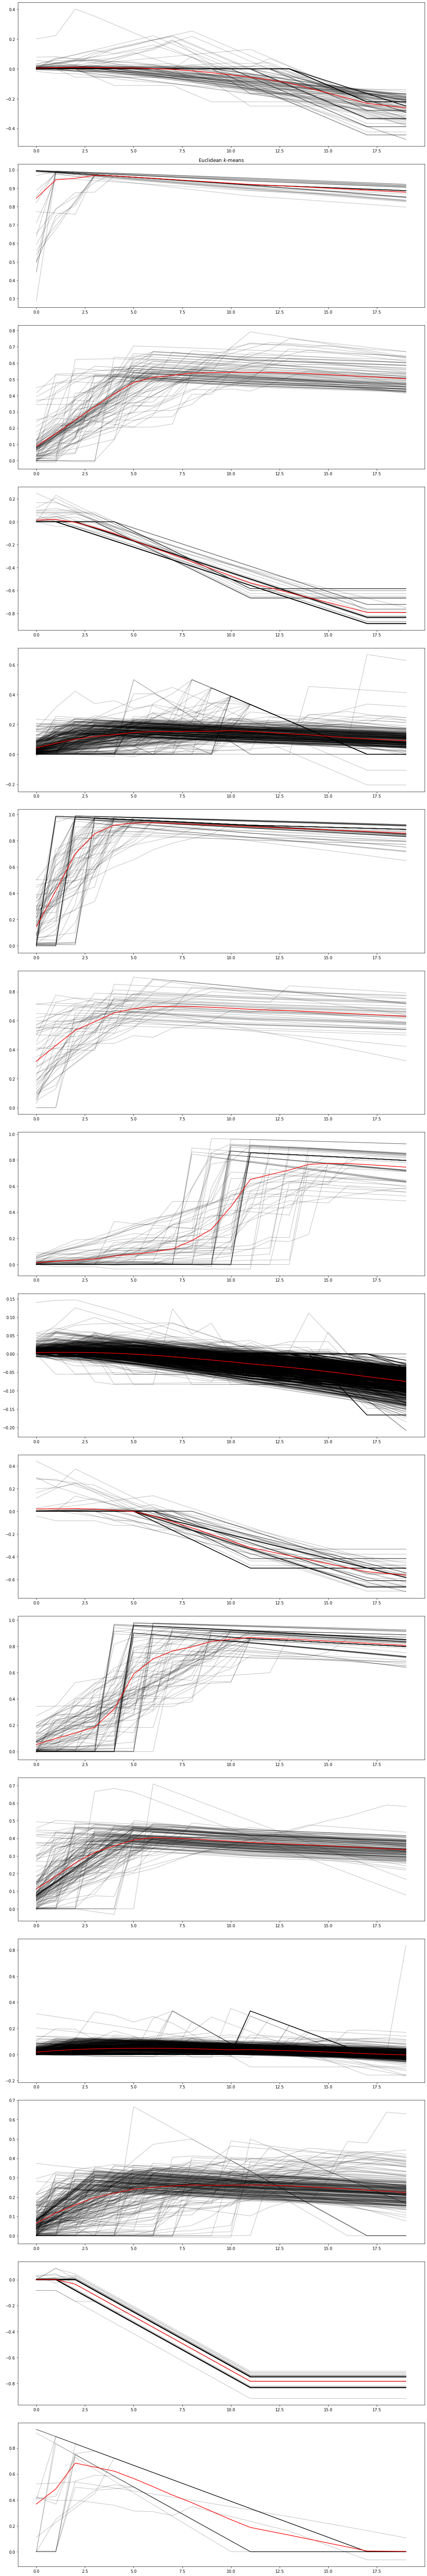

In [83]:
n_clasters=16

# Euclidean k-means
print("Euclidean k-means")
km_16 = TimeSeriesKMeans(n_clusters=n_clasters, verbose=True, random_state=seed)
y_pred = km_16.fit_predict(X_train)

plt.figure(figsize=(15,90))
for yi in range(n_clasters):
    plt.subplot(n_clasters, 1, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km_16.cluster_centers_[yi].ravel(), "r-")
    if yi == 1:
        plt.title("Euclidean $k$-means")


plt.tight_layout()
plt.show()

In [84]:
dataset = pd.DataFrame()
dataset['CONTRACT_ID'] = pivot.index
dataset['km_8'] = km_8.predict(X_train)
dataset['km_16'] = km_16.predict(X_train)
dataset.to_csv("data7.csv",index=False)

In [85]:
dataset.head()

CONTRACT_ID  km_8  km_16
0     17228104     2      2
1     17237409     0     12
2     17276280     7      7
3     17282809     6     10
4     17283247     0      8

In [140]:
def print_claster(yi, title):
    
    plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=15)
    plt.figure(figsize=(15,10))
    
    plt.title(title + " " + str(yi), fontdict={'fontsize': 30, 'fontweight': 'medium'})
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km_16.cluster_centers_[yi].ravel(), "r-")
            # fontsize of the x and y labels
    plt.savefig('out' + str(yi) + '.png')
    

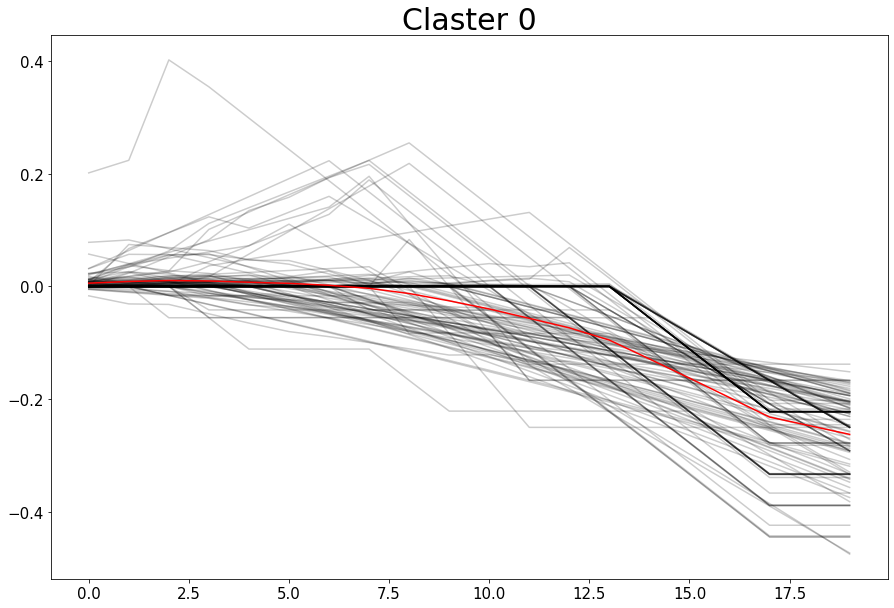

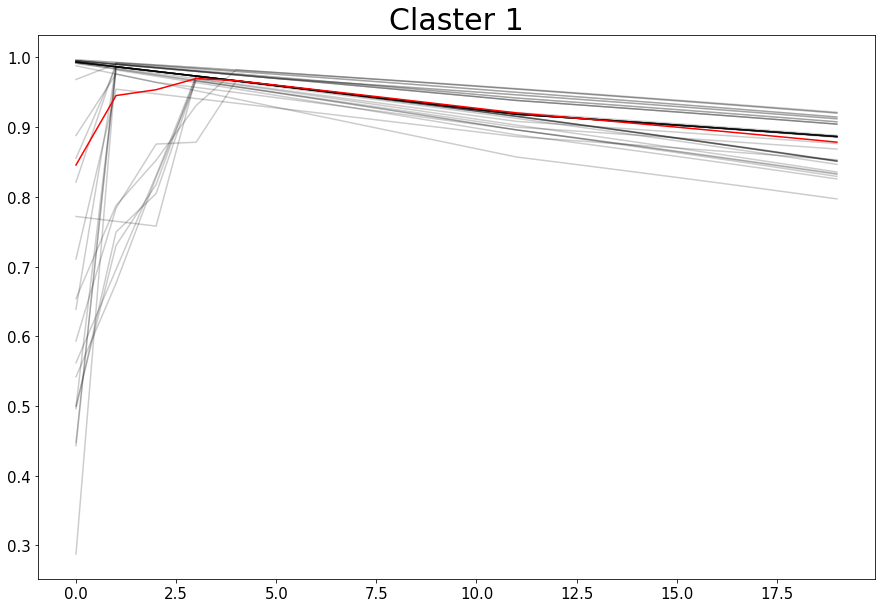

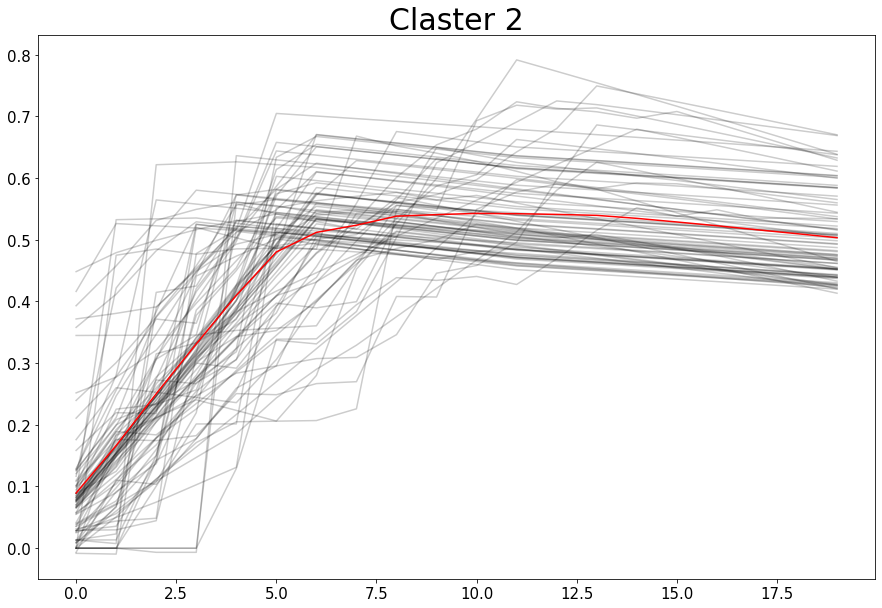

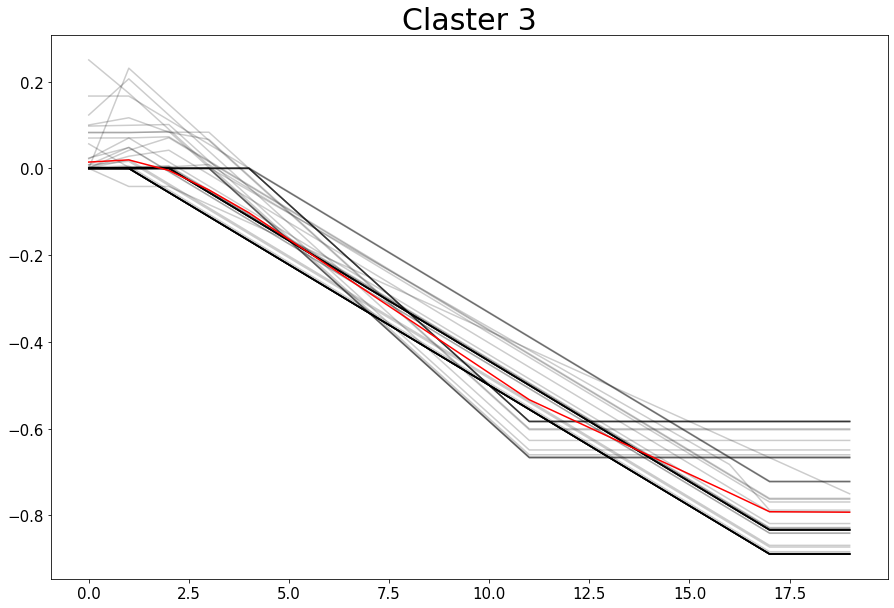

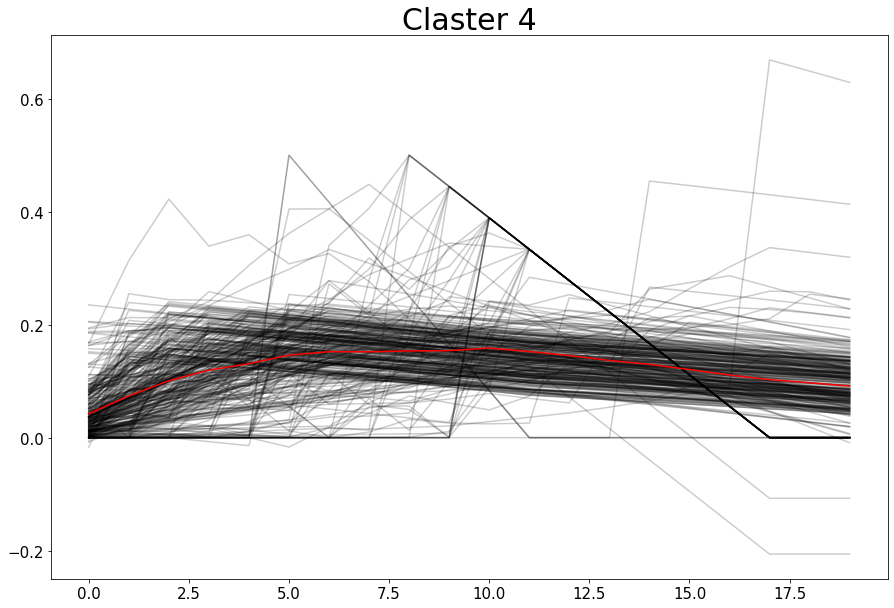

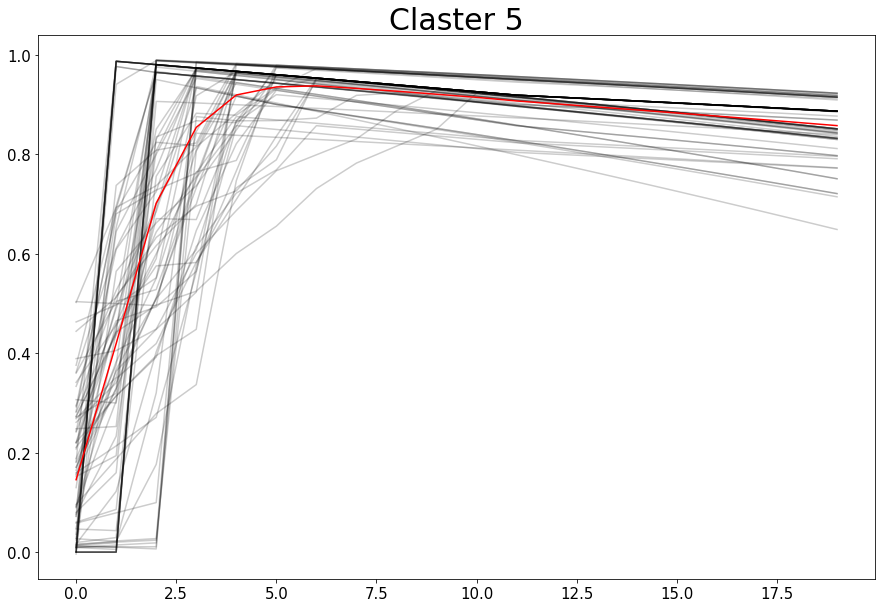

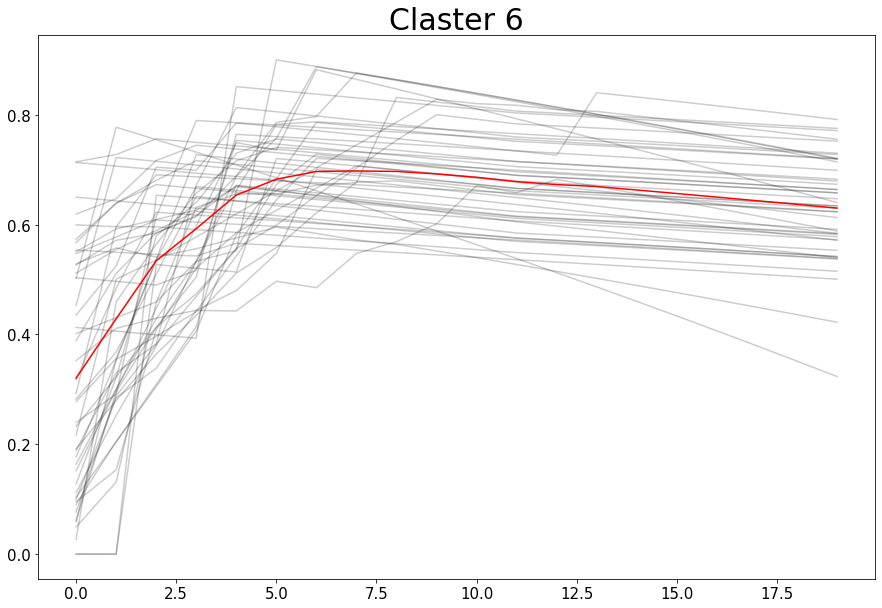

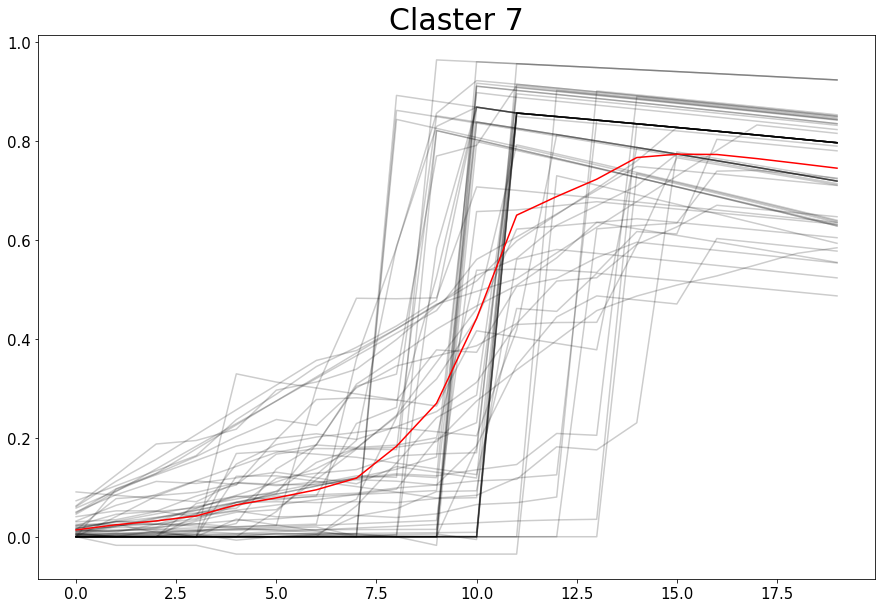

In [141]:
for i in range(8):
    print_claster(i, "Claster")

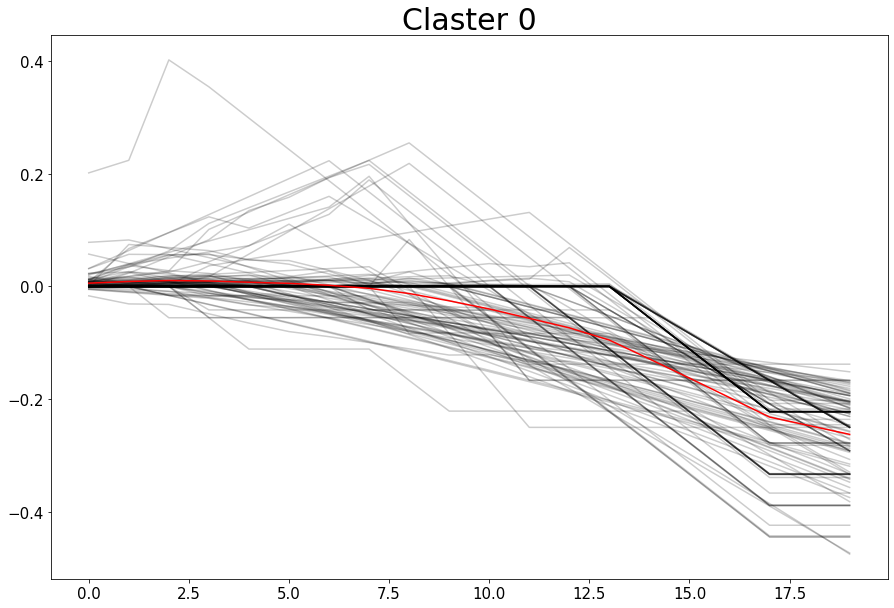

In [134]:
print_claster(0, "Claster 0")

In [132]:
import pickle

a = {'hello': 'world'}

with open('filename.pickle', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('filename.pickle', 'rb') as handle:
    b = pickle.load(handle)

print (a == b)

True


In [146]:
dataset.head()

CONTRACT_ID  km_8  km_16
0     17228104     2      2
1     17237409     0     12
2     17276280     7      7
3     17282809     6     10
4     17283247     0      8

In [155]:
claster_df = pd.merge(static, dataset, left_on='CONTRACT_ID', right_on='CONTRACT_ID')

In [165]:
static.columns

Index(['CONTRACT_ID', 'CLIENT_ID', 'TERM', 'CONTRACT_SUM', 'GENDER', 'AGE',
       'LOAN_TO_INCOME', 'PAYMENT_TO_INCOME', 'DOWNPAYMENT', 'CAR_CATEGORY',
       'GRACE_PERIOD', 'RATE_CHANGE_AFTER_GRACE'],
      dtype='object')

In [171]:
claster_df.groupby('km_8')['PAYMENT_TO_INCOME'].describe()

count      mean       std   min     25%    50%     75%   max
km_8                                                               
0     2357.0  0.247790  0.109760  0.02  0.1800  0.240  0.3100  1.67
1       43.0  0.152791  0.083018  0.02  0.0900  0.120  0.2100  0.42
2      270.0  0.192370  0.093457  0.03  0.1300  0.190  0.2500  0.82
3      252.0  0.354921  0.131871  0.08  0.2600  0.360  0.4200  0.77
4      575.0  0.218191  0.102581  0.03  0.1450  0.200  0.2800  0.61
5      103.0  0.187573  0.092211  0.03  0.1150  0.180  0.2300  0.49
6      126.0  0.193016  0.092159  0.03  0.1100  0.180  0.2600  0.41
7       66.0  0.211515  0.087534  0.04  0.1425  0.205  0.2775  0.38

In [172]:
claster_df.groupby('km_8')['CONTRACT_SUM'].describe()

count         mean         std    min        25%       50%        75%  \
km_8                                                                           
0     2357.0  1487.441264  695.166773  229.5  1032.7500  1433.300  1781.6900   
1       43.0   954.860000  459.958363  229.5   575.8150   895.050  1146.9250   
2      270.0  1161.575037  699.109196  229.5   826.2000  1009.800  1403.9700   
3      252.0   824.472024  370.686236  229.5   562.4700   740.140  1060.1975   
4      575.0  1255.071183  729.451292  229.5   851.8300  1077.570  1492.5550   
5      103.0  1195.835243  657.004528  306.0   787.9500  1004.890  1432.6750   
6      126.0  1213.359921  619.636423  382.5   832.7025  1102.370  1440.1125   
7       66.0  1244.294091  618.363519  306.0   925.2675  1088.215  1356.8475   

          max  
km_8           
0     7650.00  
1     2170.46  
2     7831.15  
3     3013.11  
4     8415.00  
5     4228.15  
6     4513.50  
7     4115.70

In [178]:
for i in static.columns:
    print(i)

CONTRACT_ID
CLIENT_ID
TERM
CONTRACT_SUM
GENDER
AGE
LOAN_TO_INCOME
PAYMENT_TO_INCOME
DOWNPAYMENT
CAR_CATEGORY
GRACE_PERIOD
RATE_CHANGE_AFTER_GRACE


In [185]:
claster_df.groupby('km_8')['RATE_CHANGE_AFTER_GRACE'].describe()

count       mean       std  min   25%   50%   75%   max
km_8                                                          
0     2357.0   5.640221  6.245980  0.0   0.0   1.0  12.0  15.0
1       43.0   7.441860  5.333195  0.0   1.5   8.0  12.0  15.0
2      270.0   9.296296  5.673357  0.0   1.0  12.0  14.0  15.0
3      252.0  14.940476  0.944911  0.0  15.0  15.0  15.0  15.0
4      575.0   8.709565  6.029327  0.0   1.0  12.0  14.0  15.0
5      103.0   7.116505  6.164893  0.0   0.0  11.0  12.0  15.0
6      126.0   8.896825  6.399787  0.0   1.0  12.0  15.0  15.0
7       66.0   8.893939  6.741670  0.0   0.0  14.0  15.0  15.0